In [25]:
import pandas as pd
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import datetime
from IPython.display import display
from sklearn import metrics 
from sklearn.datasets import make_blobs, make_circles 
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN

In [26]:
#Begin by importing the datasets

#We want to focus on these columns from the datasets
colsUsed = ['Date', 'Primary Type', 'Description','Location Description', 'Arrest', 'Domestic', 'District', 'Community Area', 'FBI Code']

#Import the csv files
Chi5 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', usecols=colsUsed)
Chi8 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', usecols=colsUsed)
Chi12 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', usecols=colsUsed)

merged = pd.concat([Chi5, Chi8], ignore_index = True)
merged.to_csv("output.csv")
display(merged.head(10))

,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Community Area,FBI Code
0,04/02/2006 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,16.0,11.0,26
1,02/26/2006 01:40:48 PM,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False,3.0,42.0,18
2,01/08/2006 11:16:00 PM,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False,3.0,69.0,04A
3,04/05/2006 06:45:00 PM,BATTERY,SIMPLE,RESIDENCE,False,False,16.0,17.0,08B
4,02/17/2006 09:03:14 PM,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False,8.0,65.0,18
5,03/30/2006 10:30:00 PM,ASSAULT,SIMPLE,APARTMENT,True,False,7.0,67.0,08A
6,04/05/2006 12:10:00 PM,BATTERY,SIMPLE,"SCHOOL, PUBLIC, BUILDING",True,False,16.0,11.0,08B
7,04/05/2006 03:00:00 PM,THEFT,$500 AND UNDER,STREET,False,False,8.0,66.0,06
8,04/05/2006 09:30:00 PM,ASSAULT,SIMPLE,PARKING LOT/GARAGE(NON.RESID.),False,False,12.0,24.0,08A
9,04/03/2006 03:00:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,3.0,42.0,08B


In [27]:
# Richard M. Daley mayor in years 1989-2011
# This dataFrame will hold all crimes during Daley's 05-11 term
daleyFull = merged
daleyFull.head(10)

,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Community Area,FBI Code
0,04/02/2006 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,16.0,11.0,26
1,02/26/2006 01:40:48 PM,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False,3.0,42.0,18
2,01/08/2006 11:16:00 PM,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False,3.0,69.0,04A
3,04/05/2006 06:45:00 PM,BATTERY,SIMPLE,RESIDENCE,False,False,16.0,17.0,08B
4,02/17/2006 09:03:14 PM,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False,8.0,65.0,18
5,03/30/2006 10:30:00 PM,ASSAULT,SIMPLE,APARTMENT,True,False,7.0,67.0,08A
6,04/05/2006 12:10:00 PM,BATTERY,SIMPLE,"SCHOOL, PUBLIC, BUILDING",True,False,16.0,11.0,08B
7,04/05/2006 03:00:00 PM,THEFT,$500 AND UNDER,STREET,False,False,8.0,66.0,06
8,04/05/2006 09:30:00 PM,ASSAULT,SIMPLE,PARKING LOT/GARAGE(NON.RESID.),False,False,12.0,24.0,08A
9,04/03/2006 03:00:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,3.0,42.0,08B


In [28]:
# Rahm Emanuel mayor in years 2011-2019
# This dataFrame will have all crimes during Emanuel's 12-17 term
emanuelFull = Chi12
emanuelFull

,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Community Area,FBI Code
0,05/03/2016 11:40:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,10.0,29.0,08B
1,05/03/2016 09:40:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,3.0,42.0,08B
2,05/03/2016 11:31:00 PM,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,15.0,25.0,24
3,05/03/2016 10:10:00 PM,BATTERY,SIMPLE,SIDEWALK,False,False,15.0,25.0,08B
4,05/03/2016 10:00:00 PM,THEFT,$500 AND UNDER,RESIDENCE,False,True,15.0,25.0,06
...,...,...,...,...,...,...,...,...,...
1456709,05/03/2016 11:33:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,10.0,30.0,08B
1456710,05/03/2016 11:30:00 PM,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True,7.0,69.0,14
1456711,05/03/2016 12:15:00 AM,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False,8.0,66.0,04B
1456712,05/03/2016 09:07:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,4.0,46.0,08B


In [29]:
# Eliminate any rows that have NULL values, we want our data to be as 
# complete as possible from BOTH
daleyFull = daleyFull.dropna()
emanuelFull = emanuelFull.dropna()

In [30]:
# Adjust the Date so that it is no longer in a string format
daleyFull.Date = pd.to_datetime(daleyFull.Date, format='%m/%d/%Y %I:%M:%S %p')

# Split this up and create new columns for hour, month, and the year 
# they all took place
daleyFull['hour'] = daleyFull['Date'].apply(lambda x:x.hour)
daleyFull['month'] = daleyFull['Date'].apply(lambda x:x.month)
daleyFull['year'] = daleyFull['Date'].apply(lambda x:x.year)

/Users/Danny/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-30-fee1a577fc58>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daleyFull['hour'] = daleyFull['Date'].apply(lambda x:x.hour)
<ipython-input-30-fee1a577fc58>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [31]:
#Just to look at the new output
daleyFull.head()

,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Community Area,FBI Code,hour,month,year
0,2006-04-02 13:00:00,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,16.0,11.0,26,13,4,2006
1,2006-02-26 13:40:48,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False,3.0,42.0,18,13,2,2006
2,2006-01-08 23:16:00,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False,3.0,69.0,04A,23,1,2006
3,2006-04-05 18:45:00,BATTERY,SIMPLE,RESIDENCE,False,False,16.0,17.0,08B,18,4,2006
4,2006-02-17 21:03:14,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False,8.0,65.0,18,21,2,2006


In [32]:
# Adjust the Date so that it is no longer in a string format
emanuelFull.Date = pd.to_datetime(emanuelFull.Date, format='%m/%d/%Y %I:%M:%S %p')

# Split this up and create new columns for hour, month, and the year 
# they all took place
emanuelFull['hour'] = emanuelFull['Date'].apply(lambda x:x.hour)
emanuelFull['month'] = emanuelFull['Date'].apply(lambda x:x.month)
emanuelFull['year'] = emanuelFull['Date'].apply(lambda x:x.year)

/Users/Danny/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-32-e3dcee2408a2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emanuelFull['hour'] = emanuelFull['Date'].apply(lambda x:x.hour)
<ipython-input-32-e3dcee2408a2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [33]:
#Look at the new output
emanuelFull.head()

,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Community Area,FBI Code,hour,month,year
0,2016-05-03 23:40:00,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,10.0,29.0,08B,23,5,2016
1,2016-05-03 21:40:00,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,3.0,42.0,08B,21,5,2016
2,2016-05-03 23:31:00,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,15.0,25.0,24,23,5,2016
3,2016-05-03 22:10:00,BATTERY,SIMPLE,SIDEWALK,False,False,15.0,25.0,08B,22,5,2016
4,2016-05-03 22:00:00,THEFT,$500 AND UNDER,RESIDENCE,False,True,15.0,25.0,06,22,5,2016


In [34]:
#Sort the data sets based on the years the crimes took place
daleyFull = daleyFull.sort_values('year', ascending=True, kind='quicksort')
emanuelFull = emanuelFull.sort_values('year', ascending=True, kind='quicksort')

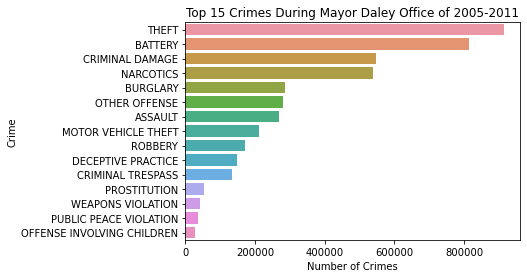

In [35]:
# Top 15 primary types between Daley as mayor
daleyGraph = sns.countplot(y='Primary Type', data = daleyFull, order=daleyFull['Primary Type'].value_counts().iloc[:15].index)
daleyGraph.set(xlabel='Number of Crimes', ylabel='Crime', title = 'Top 15 Crimes During Mayor Daley Office of 2005-2011');

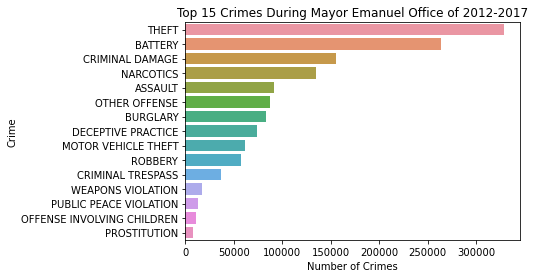

In [36]:
# Top 15 primary types between Emanuel as mayor
emanuelGraph = sns.countplot(y='Primary Type', data = emanuelFull, order=emanuelFull['Primary Type'].value_counts().iloc[:15].index)
emanuelGraph.set(xlabel='Number of Crimes', ylabel='Crime', title = 'Top 15 Crimes During Mayor Emanuel Office of 2012-2017');

Text(0, 0.5, 'Number of Crimes')

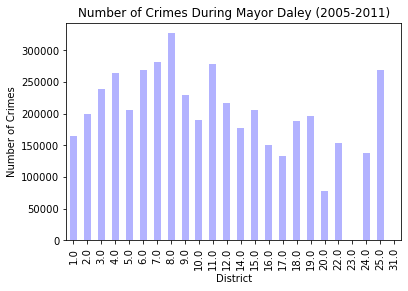

In [37]:
test = daleyFull.groupby('District')[['Primary Type']].count()
test['Primary Type'].plot(kind = 'bar', color='#b2b2ff')
plt.title('Number of Crimes During Mayor Daley (2005-2011)')
plt.ylabel('Number of Crimes')

Text(0, 0.5, 'Number of Crimes')

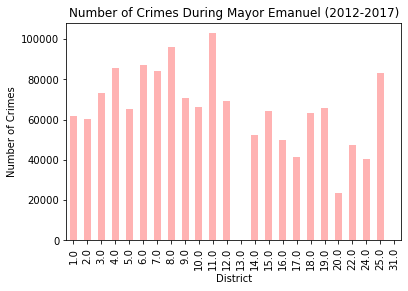

In [38]:
test2 = emanuelFull.groupby('District')[['Primary Type']].count()
test2['Primary Type'].plot(kind = 'bar', color='#ffb2b2')
plt.title('Number of Crimes During Mayor Emanuel (2012-2017)')
plt.ylabel('Number of Crimes')

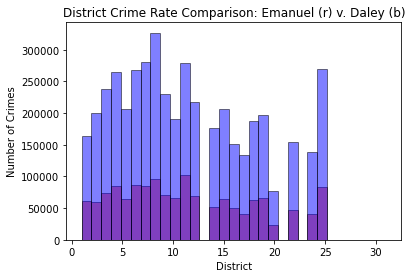

In [39]:
plt.hist(emanuelFull.District, bins = 31, color = 'red',alpha = 0.5, edgecolor = 'black')
plt.hist(daleyFull.District, bins = 31, color = 'blue',alpha = 0.5, edgecolor = 'black')
plt.title("District Crime Rate Comparison: Emanuel (r) v. Daley (b)")
plt.ylabel('Number of Crimes')
plt.xlabel('District');

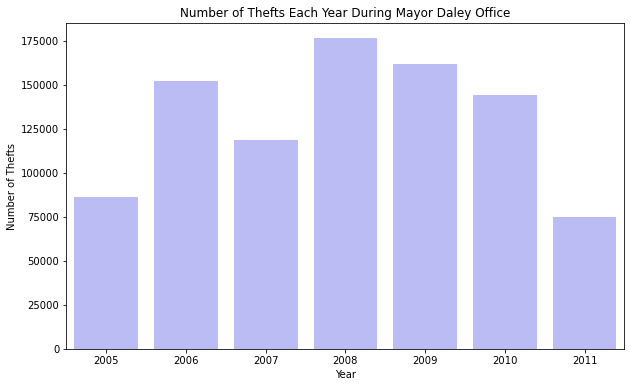

In [47]:
# Daley's term for the years
plt.figure(figsize=(10,6))
ax = sns.barplot(x='year', y='THEFT', data=daleyFull.groupby(['year'])['Primary Type'].value_counts().unstack().reset_index(), color='#b2b2ff')
ax.set(xlabel='Year', ylabel='Number of Thefts', title = 'Number of Thefts Each Year During Mayor Daley Office');

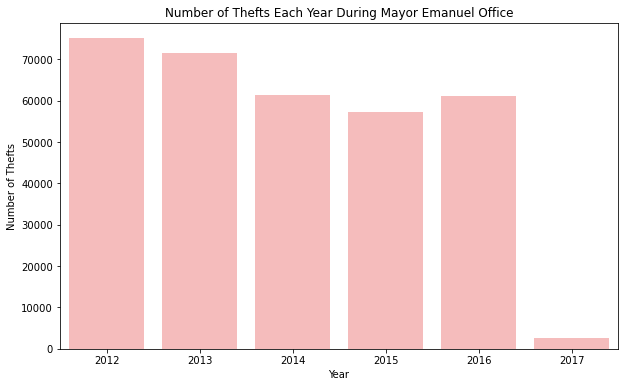

In [41]:
# Emanuel's term for the years
plt.figure(figsize=(10,6))
ax = sns.barplot(x='year', y='THEFT', data=emanuelFull.groupby(['year'])['Primary Type'].value_counts().unstack().reset_index(), color='#ffb2b2')
ax.set(xlabel='Year', ylabel='Number of Thefts', title = 'Number of Thefts Each Year During Mayor Emanuel Office');

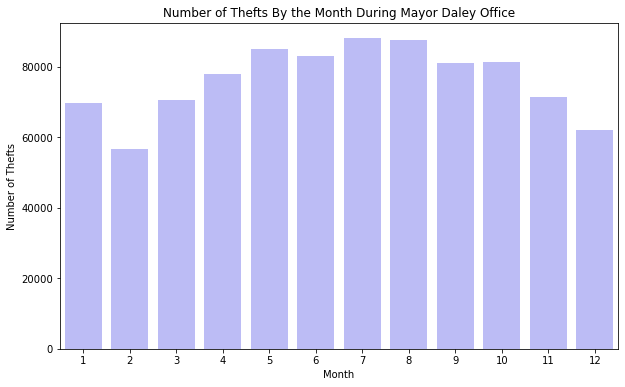

In [42]:
# Daley's term for the months
plt.figure(figsize=(10,6))
ax = sns.barplot(x='month', y='THEFT', data=daleyFull.groupby(['month'])['Primary Type'].value_counts().unstack().reset_index(), color='#b2b2ff');
plt.title('Number of Thefts By the Month During Mayor Daley Office')
ax.set(xlabel='Month', ylabel='Number of Thefts');

# Jan - Dec for the years 2008-2011 during Mayor Daley Office


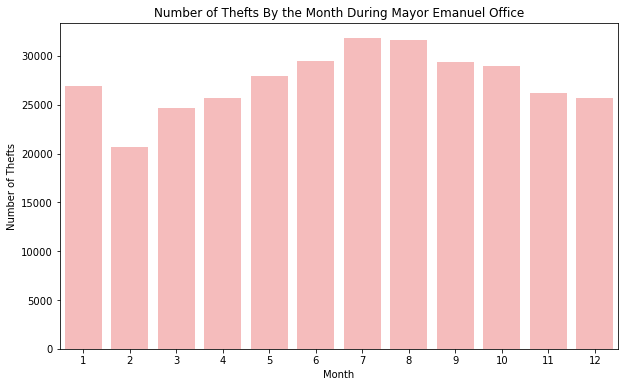

In [43]:
# Emanuel's term for the months
plt.figure(figsize=(10,6))
ax = sns.barplot(x='month', y='THEFT', data=emanuelFull.groupby(['month'])['Primary Type'].value_counts().unstack().reset_index(), color='#ffb2b2');
plt.title('Number of Thefts By the Month During Mayor Emanuel Office')
ax.set(xlabel='Month', ylabel='Number of Thefts');

# Jan - Dec for the years 20012-2017 during Mayor Emanuel Office

[Text(0, 0.5, 'Number of Thefts'), Text(0.5, 0, 'Month')]

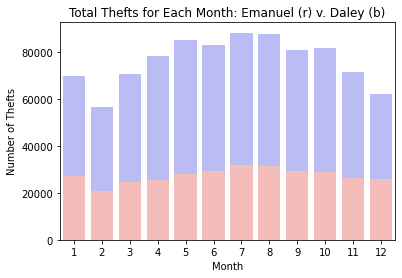

In [44]:
ax = sns.barplot(x='month', y='THEFT', data=daleyFull.groupby(['month'])['Primary Type'].value_counts().unstack().reset_index(), color='#b2b2ff');
ax = sns.barplot(x='month', y='THEFT', data=emanuelFull.groupby(['month'])['Primary Type'].value_counts().unstack().reset_index(), color='#ffb2b2');
plt.title('Total Thefts for Each Month: Emanuel (r) v. Daley (b)')
ax.set(xlabel='Month', ylabel='Number of Thefts')

# Jan - Dec for the years 2005-2011 during Mayor Daley Office
# Jan - Dec for the years 2012-2017 during Mayor Emanuel Office

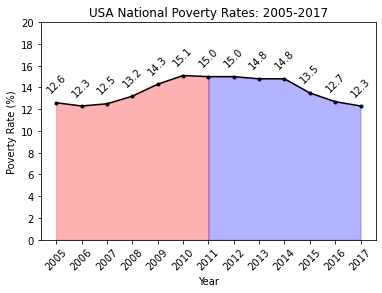

In [45]:
Year = [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
Poverty_Rate = [12.6, 12.3, 12.5, 13.2, 14.3, 15.1, 15.0, 15.0, 14.8, 14.8, 13.5, 12.7, 12.3]
plt.plot(Year, Poverty_Rate, marker = '.', color = 'black')
z2 = np.array(Poverty_Rate)

for x, y in zip(Year, Poverty_Rate):
    label = '{:.1f}'.format(y)

    plt.annotate(label, 
                 (x,y),
                 textcoords = 'offset points',
                 xytext = (0, 10),
                 ha = 'center',
                 rotation = '45')

plt.title('USA National Poverty Rates: 2005-2017')
plt.xlabel('Year')
plt.ylabel('Poverty Rate (%)')
z1 = np.array(Year)
plt.fill_between(Year, Poverty_Rate, where = (z1 <= 2011), 
                 alpha = 0.30, color = 'red')
plt.fill_between(Year, Poverty_Rate, where = (z1 >= 2011), 
                 alpha = 0.30, color = 'blue')
plt.ylim([0, 20])
plt.yticks(np.arange(0, 22, 2));
plt.xticks(np.arange(2005, 2018, 1), rotation = '45');

# Red = Mayor Emanuel
# Blue = Mayor Daley

[Text(0, 0.5, 'Prositution Reports'), Text(0.5, 0, 'Month')]

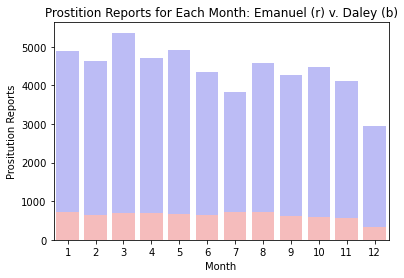

In [46]:
ax = sns.barplot(x='month', y='PROSTITUTION', data=daleyFull.groupby(['month'])['Primary Type'].value_counts().unstack().reset_index(), color='#b2b2ff');
ax = sns.barplot(x='month', y='PROSTITUTION', data=emanuelFull.groupby(['month'])['Primary Type'].value_counts().unstack().reset_index(), color='#ffb2b2');
plt.title('Prostition Reports for Each Month: Emanuel (r) v. Daley (b)')
ax.set(xlabel='Month', ylabel='Prositution Reports')